In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!git clone https://github.com/acse-jy220/SFC-CAE-Ready-to-use

Cloning into 'SFC-CAE-Ready-to-use'...
remote: Enumerating objects: 1431, done.
remote: Counting objects: 100% (528/528), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 1431 (delta 323), reused 378 (delta 176), pack-reused 903
Receiving objects: 100% (1431/1431), 52.83 MiB | 20.62 MiB/s, done.
Resolving deltas: 100% (896/896), done.


In [ ]:
%cd SFC-CAE-Ready-to-use

/content/SFC-CAE-Ready-to-use


In [ ]:
!git pull

Already up to date.


### Install dependencies

In [ ]:
!pip install -e .

Obtaining file:///content/SFC-CAE-Ready-to-use
     |████████████████████████████████| 59.5 MB 41 kB/s 
     |████████████████████████████████| 163 kB 41.6 MB/s 
     |████████████████████████████████| 223 kB 37.8 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
     |████████████████████████████████| 3.7 MB 59.1 MB/s 
     |████████████████████████████████| 83 kB 3.0 MB/s 
     |████████████████████████████████| 1.8 MB 49.5 MB/s 
     |████████████████████████████████| 495 kB 35.1 MB/s 
     |████████████████████████████████| 3.1 MB 64.9 MB/s 
     |████████████████████████████████| 74 kB 4.2 MB/s 
     |████████████████████████████████| 3.2 MB 65.3 MB/s 
     |████████████████████████████████| 251 kB 56.1 MB/s 
     |████████████████████████████████| 1.3 MB 43.5 MB/s 
     |████████████████████████████████| 294 kB 54.7 MB/s 
     |████████████████████████████████| 142 kB 75.1 MB/s 
     |████████████████████████████████| 357 kB 53.6 MB/s 
  Created wheel for dash: file

### Import useful functions inside this repo, very important, don't forget!!!

In [ ]:
from sfc_cae import *

## (Example) Get the Flow Past Cylinder data `DG_Mesh_new` (2000 snapshots) 
Try to specify you own `data_dir` !!!!

In [ ]:
!wget https://www.dropbox.com/s/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
!unzip FPC_Re3900_DG_new.zip -d './'
!rm -rf FPC_Re3900_DG_new.zip
!rm -rf './FPC_Re3900_DG_new/copy_over_N_files.py'

--2021-08-14 10:29:19--  https://www.dropbox.com/s/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip [following]
--2021-08-14 10:29:19--  https://www.dropbox.com/s/raw/b0kciap7pgq9cp5/FPC_Re3900_DG_new.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc50e9d64946a5dc6b239c7ee4f9.dl.dropboxusercontent.com/cd/0/inline/BUOBNrb26AQGa22l_NuTRS9-n4Ds1tx5QeF3cF23C7NtMTb1QxYhPX--DM_dzl_Ul_ZfavdyVrj5Z4_2eF6lAC6FkfGS3ODOLyHdIhDgQHjZfv_IZa2v21s418kBX1Ceden3WSWG2kjD7i8CNhLQAynY/file# [following]
--2021-08-14 10:29:19--  https://uc50e9d64946a5dc6b239c7ee4f9.dl.dropboxusercontent.com/cd/0/inline/BUOBNrb26AQGa22l_NuTRS9-n4Ds1tx5QeF3cF23C7NtMTb1QxYhPX--DM_d

# Specify the folder of the data and load the full_tensors from `vtu` files, or `txt` files, like following, check the folder you specified only contains `vtu` and `txt` files!!!

### specify your own {DATA_DIR} of vtu files here.

In [ ]:
data_path = 'FPC_Re3900_DG_new/'
vtu_fields = ['Velocity']

### Specify the `vtu_fields` (a list) of an unadapted mesh to read in, returns:
**full_tensor**: The tensor of all `vtu_fields` you specified for all snapshots in the {data_path}, 3-dimension, the first dimension is number of snapshots in that {data_path}, the second is the number of Nodes in each snapshots, the last is number of components in the `vtu_fields`, for example, in this FPC test case,
two components for `Velocity`, one for `Pressure`. <br> <br>
**coords**: The coordinates of the unadapted mesh Nodes from the `vtu` file, 3-dimension.

In [ ]:
full_tensor, coords, cells = read_in_files(data_path, vtu_fields = vtu_fields)

  0% (1 of 2000) |                       | Elapsed Time: 0:00:00 ETA:   0:03:31

file_prefix: FPC_Re3900_DG_new/fpc_, file_format: .vtu
Read in vtu Data......

mesh adapted at snapshot 0


100% (2000 of 2000) |####################| Elapsed Time: 0:03:25 Time:  0:03:25


For reading tensor from `txt` files, check the `read_in_files` function from `util.py` at https://github.com/acse-jy220/SFC-CAE-Ready-to-use

### Save the full tensor in your `google_drive` for further use.

In [ ]:
# torch.save(full_tensor, '/content/gdrive/MyDrive/FPC_new.pt')
# torch.save(coords, '/content/gdrive/MyDrive/FPC_new_mesh.pt')

### Load tensor from google drive

In [ ]:
full_tensor = torch.load('/content/gdrive/MyDrive/FPC_new_velocity.pt').float()
coords = torch.load('/content/gdrive/MyDrive/FPC_new_mesh.pt') 

In [ ]:
full_tensor.shape

torch.Size([2000, 20550, 2])

In [ ]:
coords.shape

torch.Size([20550, 3])

### Generate space-filling-curves from coords (unadapted) of the `vtu` files

In [ ]:
ncurves = 5  # specify space-filling curve numbers
# for DG mesh
space_filling_orderings, invert_space_filling_orderings = get_sfc_curves_from_coords(coords, ncurves)

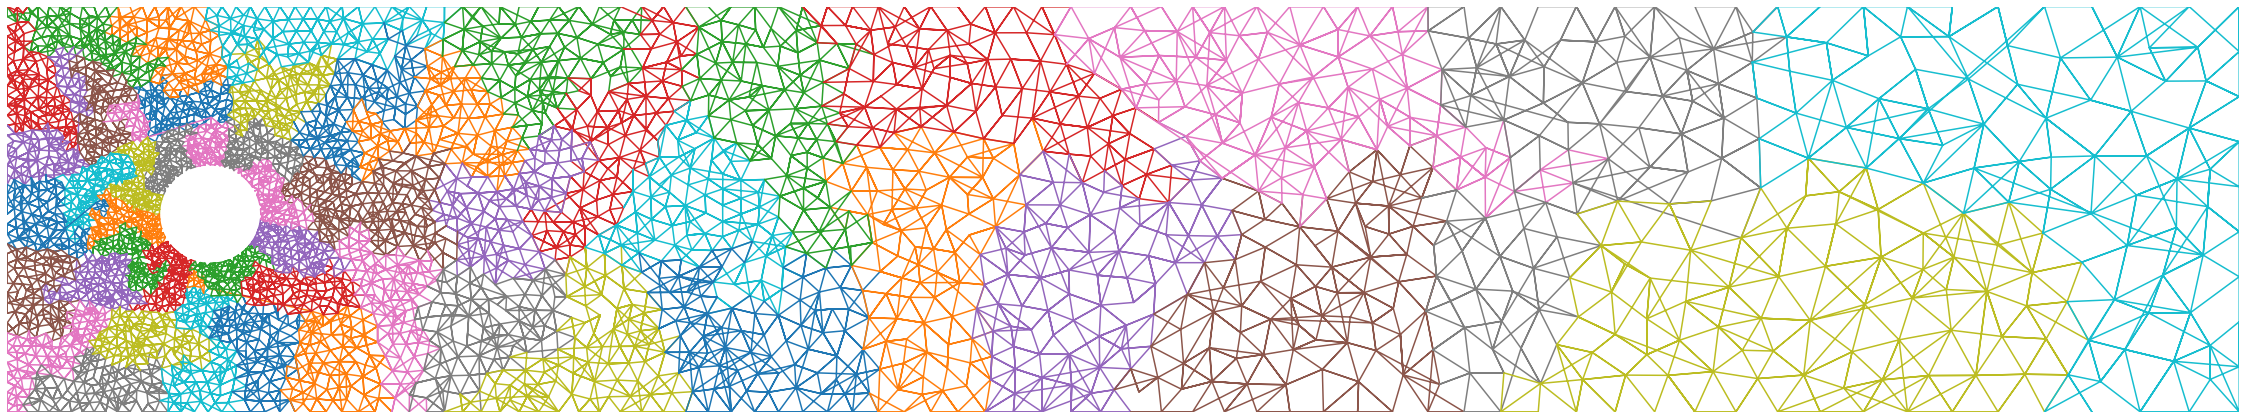

In [ ]:
#visualize the space-filling curve, only works for the FPC example
plot_trace_vtu_2D(coords[space_filling_orderings[0]], 50)
# countour_plot_vtu_2D(coords[space_filling_orderings[0]], 50, cmap = cmocean.cm.dense_r)

In [ ]:
# see this in get_sfc_curves_from_coords() func in utils.py, find sparse connectivity for DG meshes.
findm, colm, ncolm = sfc.form_spare_matric_from_pts(coords, coords.shape[0])

In [ ]:
colm = colm[:ncolm]

In [ ]:
edge_list = csr_to_edges(findm, colm)

### Print out the filled connectivity by the space-filling curves.

In [ ]:
filled_edges_for_sfcs(edge_list, space_filling_orderings)

filled adjacencies by the 1 sfcs : 20013 / 111711
filled adjacencies by the 2 sfcs : 36407 / 111711
filled adjacencies by the 3 sfcs : 49531 / 111711
filled adjacencies by the 4 sfcs : 60129 / 111711
filled adjacencies by the 5 sfcs : 68778 / 111711


### Random split the tensor into training_set: valid_set: test_set = 0.8:0.1:0.1 = 8:1:1

In [ ]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1 
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = full_tensor.shape[0])

In [ ]:
full_set, k, b = standardlize_tensor(full_tensor, lower = -1, upper = 1)

In [ ]:
k.detach().numpy()

array([11.431093, 13.955714], dtype=float32)

In [ ]:
b.detach().numpy()

array([-0.17484525,  0.01892216], dtype=float32)

In [ ]:
train_set = full_set[train_index - 1]
valid_set = full_set[valid_index - 1]
test_set = full_set[test_index - 1]

### The following cell is quite vital, as it indicates the parameters for the **autoencoder**

`input_size` is the number of Node, for example 20550 <br> `dimension` is the dimension of the data in Vtu file, 2 or 3.<br> `components` is the number of components you are compressing, if the tensor is 2 dimension, then it's default of 1. `self_concat` is chennel copying operation, you could keep it default as 1, or 2 when you have multiple SFCs. <br> `structured`: bool, whether you are training SFC-CAE on a structured mesh or not.<br>`nearest_neighboring`: bool, adding sparse layers or not, suggest to turn on.<br>
`dims_letent`: The dimension of the compressed data after applying decoder. <br>
`space_filling_orderings`, `invert_space_filling_orderings` : lists of sfc\inverse_sfc nums, generated by `get_sfc_curves_from_coords` function, or read the orderings from a `csv` file on your own. <br>
`activation`: Can be customly defined, but if you not spcify, the activation would be `ReLU()` for structured mesh, and `Tanh()` for unstructured mesh.

In [ ]:
input_size = full_tensor.shape[1]
dimension = 2
if full_tensor.ndim == 2: components = 1
else: components = full_tensor.shape[-1]
self_concat = 2
structured = False
nearest_neighbouring = True # shut down this may lead to a slightly poorer performance, but a quicker training spped
dims_latent = 8
activation = nn.Tanh()
variational = False
# space_filling_orderings = (mannully spcify it if you didn't generate in the cells before)
# invert_space_filling_orderings = 

In [ ]:
autoencoder = SFC_CAE(input_size,
                      dimension,
                      components,
                      structured,
                      self_concat,
                      nearest_neighbouring,
                      dims_latent,
                      space_filling_orderings[:2], 
                      invert_space_filling_orderings[:2],
                      activation,
                      variational = variational)

In [ ]:
autoencoder.output_structure()

The LaTeX script for the table structure of the SFC-CAE has been written to 'LatexTable.txt', please copy it to a LaTeX compiler environment, e.g. overleaf.


### The following are just normal Hyperparameters for training, free to tune it yourself.

In [ ]:
batch_size = 16
seed = 31
lr = 1e-4
n_epochs = 2000
weight_decay = 0
criterion_type = 'MSE'
valid_batch_size = valid_set.shape[0]

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

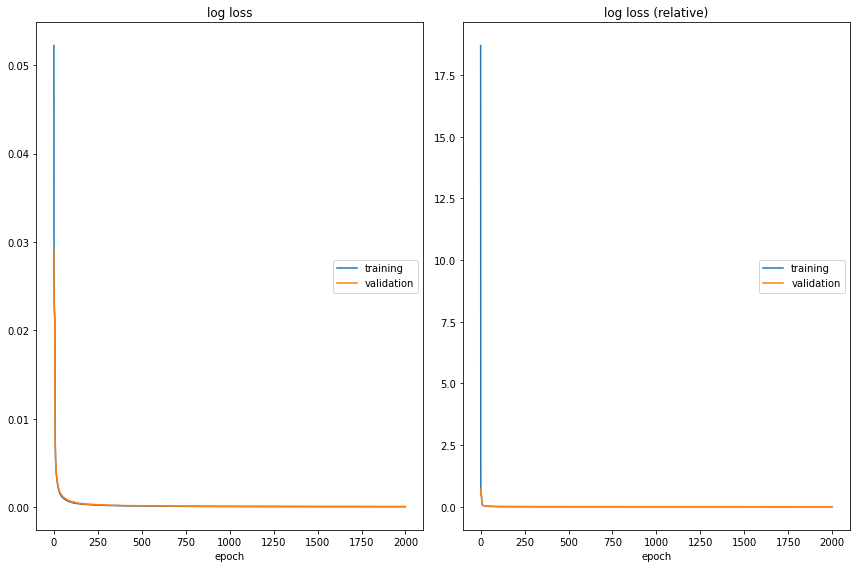

log loss
	training         	 (min:    0.000, max:    0.052, cur:    0.000)
	validation       	 (min:    0.000, max:    0.029, cur:    0.000)
log loss (relative)
	training         	 (min:    0.001, max:   18.699, cur:    0.001)
	validation       	 (min:    0.001, max:    0.712, cur:    0.001)
Epoch:  1999 | train loss: 5.736527e-05 | valid loss: 8.272397e-05 
      	| train loss (relative): 7.999207e-04 | valid loss (relative): 1.150446e-03 
Epoch 1999 use: 3.74 second.

test MSE Error: 7.028383e-05 | relative MSE Error: 9.783317e-04 
 Total time used for training: 2.09 hour.
MESLoss saved to  /content/gdrive/MyDrive/Models/FPC/Variational_False_Changelr_False_MSELoss_Latent_8_nearest_neighbouring_True_SFC_nums_2_startlr_0.0001_n_epoches_2000.txt
relative MSELoss saved to  /content/gdrive/MyDrive/Models/FPC/Variational_False_Changelr_False_reMSELoss_Latent_8_nearest_neighbouring_True_SFC_nums_2_startlr_0.0001_n_epoches_2000.txt
model saved to /content/gdrive/MyDrive/Models/FPC/Variation

In [ ]:
autoencoder = train_model(autoencoder, 
                          train_loader = train_loader,
                          valid_loader = valid_loader,
                          test_loader = test_loader,
                          n_epochs = n_epochs, 
                          lr = lr,
                          weight_decay = weight_decay,
                          criterion_type = criterion_type,
                          seed = seed,
                          save_path = '/content/gdrive/MyDrive/Models/FPC/')

### Other functions need to be add, like convert the result back to `csv`/`vtu` files.....

In [ ]:
# added functions to output vtu files from reconstruct
model_device = torch.device('cuda')
autoencoder = autoencoder.to(model_device)
save_path = 'reconstructed_FPC_DG'
import os
os.system(F'mkdir -p {save_path}')

0

In [ ]:
result_vtu_to_vtu(data_path, save_path, vtu_fields, autoencoder, k.detach().numpy(), b.detach().numpy(), model_device = model_device)

  0% (1 of 2000) |                       | Elapsed Time: 0:00:00 ETA:   0:04:01

file_prefix: FPC_Re3900_CG_new/fpc_, file_format: .vtu
Write vtu Data......

Reconstruction MSE error for snapshot 0: 0.000100
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1: 0.000095
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 2: 0.000046
torch.Size([3571, 2])


  0% (7 of 2000) |                       | Elapsed Time: 0:00:00 ETA:   0:01:34

Reconstruction MSE error for snapshot 3: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 4: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 5: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 6: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 7: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 8: 0.000034
torch.Size([3571, 2])


  0% (13 of 2000) |                      | Elapsed Time: 0:00:00 ETA:   0:01:21

Reconstruction MSE error for snapshot 9: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 10: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 11: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 12: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 13: 0.000057
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 14: 0.000055
torch.Size([3571, 2])


  1% (20 of 2000) |                      | Elapsed Time: 0:00:00 ETA:   0:01:16

Reconstruction MSE error for snapshot 15: 0.000044
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 16: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 17: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 18: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 19: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 20: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 21: 0.000038


  1% (26 of 2000) |                      | Elapsed Time: 0:00:00 ETA:   0:01:14

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 22: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 23: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 24: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 25: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 26: 0.000024
torch.Size([3571, 2])


  1% (32 of 2000) |                      | Elapsed Time: 0:00:01 ETA:   0:01:13

Reconstruction MSE error for snapshot 27: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 28: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 29: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 30: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 31: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 32: 0.000029
torch.Size([3571, 2])


  1% (38 of 2000) |                      | Elapsed Time: 0:00:01 ETA:   0:01:12

Reconstruction MSE error for snapshot 33: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 34: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 35: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 36: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 37: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 38: 0.000024
torch.Size([3571, 2])


  2% (45 of 2000) |                      | Elapsed Time: 0:00:01 ETA:   0:01:10

Reconstruction MSE error for snapshot 39: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 40: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 41: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 42: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 43: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 44: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 45: 0.000036
torch.Size([3571, 2])


  2% (51 of 2000) |                      | Elapsed Time: 0:00:01 ETA:   0:01:10

Reconstruction MSE error for snapshot 46: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 47: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 48: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 49: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 50: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 51: 0.000023
torch.Size([3571, 2])


  2% (58 of 2000) |                      | Elapsed Time: 0:00:02 ETA:   0:01:09

Reconstruction MSE error for snapshot 52: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 53: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 54: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 55: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 56: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 57: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 58: 0.000024
torch.Size([3571, 2])


  3% (64 of 2000) |                      | Elapsed Time: 0:00:02 ETA:   0:01:06

Reconstruction MSE error for snapshot 59: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 60: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 61: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 62: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 63: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 64: 0.000031
torch.Size([3571, 2])


  3% (70 of 2000) |                      | Elapsed Time: 0:00:02 ETA:   0:01:05

Reconstruction MSE error for snapshot 65: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 66: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 67: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 68: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 69: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 70: 0.000035
torch.Size([3571, 2])


  3% (76 of 2000) |                      | Elapsed Time: 0:00:02 ETA:   0:01:05

Reconstruction MSE error for snapshot 71: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 72: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 73: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 74: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 75: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 76: 0.000041
torch.Size([3571, 2])


  4% (82 of 2000) |                      | Elapsed Time: 0:00:02 ETA:   0:01:05

Reconstruction MSE error for snapshot 77: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 78: 0.000054
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 79: 0.000065
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 80: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 81: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 82: 0.000035
torch.Size([3571, 2])


  4% (89 of 2000) |                      | Elapsed Time: 0:00:03 ETA:   0:01:05

Reconstruction MSE error for snapshot 83: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 84: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 85: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 86: 0.000044
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 87: 0.000066
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 88: 0.000213
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 89: 0.000507
torch.Size([3571, 2])


  4% (96 of 2000) |#                     | Elapsed Time: 0:00:03 ETA:   0:01:04

Reconstruction MSE error for snapshot 90: 0.000069
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 91: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 92: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 93: 0.000063
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 94: 0.000076
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 95: 0.003465
torch.Size([3571, 2])


  5% (102 of 2000) |#                    | Elapsed Time: 0:00:03 ETA:   0:01:04

Reconstruction MSE error for snapshot 96: 0.000075
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 97: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 98: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 99: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 100: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 101: 0.000057
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 102: 0.000166


  5% (106 of 2000) |#                    | Elapsed Time: 0:00:03 ETA:   0:01:04

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 103: 0.000073
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 104: 0.000084
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 105: 0.000056
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 106: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 107: 0.000052
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 108: 0.000097
torch.Size([3571, 2])


  5% (112 of 2000) |#                    | Elapsed Time: 0:00:03 ETA:   0:01:04

Reconstruction MSE error for snapshot 109: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 110: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 111: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 112: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 113: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 114: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 115: 0.000038
torch.Size([3571, 2])


  6% (120 of 2000) |#                    | Elapsed Time: 0:00:04 ETA:   0:01:03

Reconstruction MSE error for snapshot 116: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 117: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 118: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 119: 0.000053
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 120: 0.000080
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 121: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 122: 0.000041
torch.Size([3571, 2])


  6% (126 of 2000) |#                    | Elapsed Time: 0:00:04 ETA:   0:01:03

Reconstruction MSE error for snapshot 123: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 124: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 125: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 126: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 127: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 128: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 129: 0.000046
torch.Size([3571, 2])


  6% (134 of 2000) |#                    | Elapsed Time: 0:00:04 ETA:   0:01:02

Reconstruction MSE error for snapshot 130: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 131: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 132: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 133: 0.000052
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 134: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 135: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 136: 0.000052
torch.Size([3571, 2])


  7% (141 of 2000) |#                    | Elapsed Time: 0:00:04 ETA:   0:01:02

Reconstruction MSE error for snapshot 137: 0.000052
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 138: 0.000065
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 139: 0.000182
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 140: 0.000069
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 141: 0.000073
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 142: 0.000574
torch.Size([3571, 2])


  7% (148 of 2000) |#                    | Elapsed Time: 0:00:05 ETA:   0:01:01

Reconstruction MSE error for snapshot 143: 0.000178
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 144: 0.000071
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 145: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 146: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 147: 0.000052
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 148: 0.000127
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 149: 0.000047


  7% (154 of 2000) |#                    | Elapsed Time: 0:00:05 ETA:   0:01:01

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 150: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 151: 0.000055
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 152: 0.000068
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 153: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 154: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 155: 0.000044
torch.Size([3571, 2])


  7% (158 of 2000) |#                    | Elapsed Time: 0:00:05 ETA:   0:01:01

Reconstruction MSE error for snapshot 156: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 157: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 158: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 159: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 160: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 161: 0.000050
torch.Size([3571, 2])


  8% (166 of 2000) |#                    | Elapsed Time: 0:00:05 ETA:   0:01:01

Reconstruction MSE error for snapshot 162: 0.000044
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 163: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 164: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 165: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 166: 0.000057
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 167: 0.000073
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 168: 0.000058
torch.Size([3571, 2])


  8% (174 of 2000) |#                    | Elapsed Time: 0:00:05 ETA:   0:01:00

Reconstruction MSE error for snapshot 169: 0.000058
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 170: 0.000080
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 171: 0.000064
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 172: 0.000160
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 173: 0.000054
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 174: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 175: 0.000040
torch.Size([3571, 2])


  9% (182 of 2000) |#                    | Elapsed Time: 0:00:06 ETA:   0:01:00

Reconstruction MSE error for snapshot 176: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 177: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 178: 0.000067
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 179: 0.000060
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 180: 0.000057
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 181: 0.000059
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 182: 0.000272
torch.Size([3571, 2])


  9% (188 of 2000) |#                    | Elapsed Time: 0:00:06 ETA:   0:01:00

Reconstruction MSE error for snapshot 183: 0.000617
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 184: 0.000545
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 185: 0.000069
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 186: 0.000288
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 187: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 188: 0.000038
torch.Size([3571, 2])


  9% (192 of 2000) |##                   | Elapsed Time: 0:00:06 ETA:   0:01:00

Reconstruction MSE error for snapshot 189: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 190: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 191: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 192: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 193: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 194: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 195: 0.000032
torch.Size([3571, 2])


 10% (200 of 2000) |##                   | Elapsed Time: 0:00:06 ETA:   0:00:59

Reconstruction MSE error for snapshot 196: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 197: 0.000157
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 198: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 199: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 200: 0.000102
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 201: 0.000053
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 202: 0.000141
torch.Size([3571, 2])


 10% (209 of 2000) |##                   | Elapsed Time: 0:00:07 ETA:   0:00:59

Reconstruction MSE error for snapshot 203: 0.000233
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 204: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 205: 0.000056
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 206: 0.004222
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 207: 0.000050
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 208: 0.000031
torch.Size([3571, 2])


 10% (212 of 2000) |##                   | Elapsed Time: 0:00:07 ETA:   0:00:59

Reconstruction MSE error for snapshot 209: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 210: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 211: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 212: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 213: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 214: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 215: 0.000048
torch.Size([3571, 2])


 11% (222 of 2000) |##                   | Elapsed Time: 0:00:07 ETA:   0:00:59

Reconstruction MSE error for snapshot 216: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 217: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 218: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 219: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 220: 0.000098
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 221: 0.000039
torch.Size([3571, 2])


 11% (228 of 2000) |##                   | Elapsed Time: 0:00:07 ETA:   0:00:59

Reconstruction MSE error for snapshot 222: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 223: 0.000101
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 224: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 225: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 226: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 227: 0.000078
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 228: 0.000033
torch.Size([3571, 2])


 11% (235 of 2000) |##                   | Elapsed Time: 0:00:08 ETA:   0:00:59

Reconstruction MSE error for snapshot 229: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 230: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 231: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 232: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 233: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 234: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 235: 0.000025
torch.Size([3571, 2])


 12% (241 of 2000) |##                   | Elapsed Time: 0:00:08 ETA:   0:00:59

Reconstruction MSE error for snapshot 236: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 237: 0.000080
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 238: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 239: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 240: 0.000159
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 241: 0.000034
torch.Size([3571, 2])


 12% (247 of 2000) |##                   | Elapsed Time: 0:00:08 ETA:   0:00:58

Reconstruction MSE error for snapshot 242: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 243: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 244: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 245: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 246: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 247: 0.000036
torch.Size([3571, 2])


 12% (253 of 2000) |##                   | Elapsed Time: 0:00:08 ETA:   0:00:58

Reconstruction MSE error for snapshot 248: 0.000092
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 249: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 250: 0.000121
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 251: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 252: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 253: 0.000036
torch.Size([3571, 2])


 13% (260 of 2000) |##                   | Elapsed Time: 0:00:08 ETA:   0:00:58

Reconstruction MSE error for snapshot 254: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 255: 0.000126
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 256: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 257: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 258: 0.000263
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 259: 0.000149
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 260: 0.000044
torch.Size([3571, 2])


 13% (266 of 2000) |##                   | Elapsed Time: 0:00:09 ETA:   0:00:58

Reconstruction MSE error for snapshot 261: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 262: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 263: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 264: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 265: 0.000174
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 266: 0.000042
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 267: 0.000045


 13% (273 of 2000) |##                   | Elapsed Time: 0:00:09 ETA:   0:00:58

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 268: 0.000205
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 269: 0.000165
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 270: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 271: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 272: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 273: 0.000026
torch.Size([3571, 2])


 13% (279 of 2000) |##                   | Elapsed Time: 0:00:09 ETA:   0:00:57

Reconstruction MSE error for snapshot 274: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 275: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 276: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 277: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 278: 0.000074
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 279: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 280: 0.000030
torch.Size([3571, 2])


 14% (285 of 2000) |##                   | Elapsed Time: 0:00:09 ETA:   0:00:57

Reconstruction MSE error for snapshot 281: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 282: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 283: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 284: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 285: 0.000097
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 286: 0.000033
torch.Size([3571, 2])


 14% (291 of 2000) |###                  | Elapsed Time: 0:00:09 ETA:   0:00:57

Reconstruction MSE error for snapshot 287: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 288: 0.000060
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 289: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 290: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 291: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 292: 0.000032
torch.Size([3571, 2])


 14% (297 of 2000) |###                  | Elapsed Time: 0:00:10 ETA:   0:00:57

Reconstruction MSE error for snapshot 293: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 294: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 295: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 296: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 297: 0.000085
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 298: 0.000259
torch.Size([3571, 2])


 15% (304 of 2000) |###                  | Elapsed Time: 0:00:10 ETA:   0:00:57

Reconstruction MSE error for snapshot 299: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 300: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 301: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 302: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 303: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 304: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 305: 0.000024
torch.Size([3571, 2])


 15% (311 of 2000) |###                  | Elapsed Time: 0:00:10 ETA:   0:00:56

Reconstruction MSE error for snapshot 306: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 307: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 308: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 309: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 310: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 311: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 312: 0.000028
torch.Size([3571, 2])


 15% (318 of 2000) |###                  | Elapsed Time: 0:00:10 ETA:   0:00:56

Reconstruction MSE error for snapshot 313: 0.000071
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 314: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 315: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 316: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 317: 0.000064
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 318: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 319: 0.000030
torch.Size([3571, 2])


 16% (326 of 2000) |###                  | Elapsed Time: 0:00:11 ETA:   0:00:56

Reconstruction MSE error for snapshot 320: 0.000065
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 321: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 322: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 323: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 324: 0.002159
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 325: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 326: 0.000166
torch.Size([3571, 2])


 16% (332 of 2000) |###                  | Elapsed Time: 0:00:11 ETA:   0:00:55

Reconstruction MSE error for snapshot 327: 0.000159
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 328: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 329: 0.000080
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 330: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 331: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 332: 0.000020
torch.Size([3571, 2])


 16% (336 of 2000) |###                  | Elapsed Time: 0:00:11 ETA:   0:00:55

Reconstruction MSE error for snapshot 333: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 334: 0.000093
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 335: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 336: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 337: 0.000064
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 338: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 339: 0.000023
torch.Size([3571, 2])


 17% (344 of 2000) |###                  | Elapsed Time: 0:00:11 ETA:   0:00:55

Reconstruction MSE error for snapshot 340: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 341: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 342: 0.000072
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 343: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 344: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 345: 0.000082
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 346: 0.000022
torch.Size([3571, 2])


 17% (352 of 2000) |###                  | Elapsed Time: 0:00:11 ETA:   0:00:54

Reconstruction MSE error for snapshot 347: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 348: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 349: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 350: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 351: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 352: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 353: 0.000060
torch.Size([3571, 2])


 17% (359 of 2000) |###                  | Elapsed Time: 0:00:12 ETA:   0:00:54

Reconstruction MSE error for snapshot 354: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 355: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 356: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 357: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 358: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 359: 0.000107
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 360: 0.000021


 18% (366 of 2000) |###                  | Elapsed Time: 0:00:12 ETA:   0:00:53

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 361: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 362: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 363: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 364: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 365: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 366: 0.000024
torch.Size([3571, 2])


 18% (372 of 2000) |###                  | Elapsed Time: 0:00:12 ETA:   0:00:53

Reconstruction MSE error for snapshot 367: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 368: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 369: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 370: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 371: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 372: 0.000025
torch.Size([3571, 2])


 18% (379 of 2000) |###                  | Elapsed Time: 0:00:12 ETA:   0:00:53

Reconstruction MSE error for snapshot 373: 0.000047
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 374: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 375: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 376: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 377: 0.000152
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 378: 0.000144
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 379: 0.000134
torch.Size([3571, 2])


 19% (386 of 2000) |####                 | Elapsed Time: 0:00:13 ETA:   0:00:53

Reconstruction MSE error for snapshot 380: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 381: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 382: 0.000104
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 383: 0.000204
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 384: 0.000242
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 385: 0.000109
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 386: 0.000024
torch.Size([3571, 2])


 19% (393 of 2000) |####                 | Elapsed Time: 0:00:13 ETA:   0:00:53

Reconstruction MSE error for snapshot 387: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 388: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 389: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 390: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 391: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 392: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 393: 0.000026
torch.Size([3571, 2])


 19% (399 of 2000) |####                 | Elapsed Time: 0:00:13 ETA:   0:00:53

Reconstruction MSE error for snapshot 394: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 395: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 396: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 397: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 398: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 399: 0.000020
torch.Size([3571, 2])


 20% (405 of 2000) |####                 | Elapsed Time: 0:00:13 ETA:   0:00:53

Reconstruction MSE error for snapshot 400: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 401: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 402: 0.000124
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 403: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 404: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 405: 0.000022
torch.Size([3571, 2])


 20% (412 of 2000) |####                 | Elapsed Time: 0:00:13 ETA:   0:00:53

Reconstruction MSE error for snapshot 406: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 407: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 408: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 409: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 410: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 411: 0.000019
torch.Size([3571, 2])


 20% (418 of 2000) |####                 | Elapsed Time: 0:00:14 ETA:   0:00:53

Reconstruction MSE error for snapshot 412: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 413: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 414: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 415: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 416: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 417: 0.000023
torch.Size([3571, 2])


 21% (424 of 2000) |####                 | Elapsed Time: 0:00:14 ETA:   0:00:53

Reconstruction MSE error for snapshot 418: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 419: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 420: 0.000044
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 421: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 422: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 423: 0.000019
torch.Size([3571, 2])


 21% (430 of 2000) |####                 | Elapsed Time: 0:00:14 ETA:   0:00:53

Reconstruction MSE error for snapshot 424: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 425: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 426: 0.000055
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 427: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 428: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 429: 0.000017
torch.Size([3571, 2])


 21% (436 of 2000) |####                 | Elapsed Time: 0:00:14 ETA:   0:00:53

Reconstruction MSE error for snapshot 430: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 431: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 432: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 433: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 434: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 435: 0.000015
torch.Size([3571, 2])


 22% (442 of 2000) |####                 | Elapsed Time: 0:00:14 ETA:   0:00:53

Reconstruction MSE error for snapshot 436: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 437: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 438: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 439: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 440: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 441: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 442: 0.000018


 22% (445 of 2000) |####                 | Elapsed Time: 0:00:15 ETA:   0:00:52

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 443: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 444: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 445: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 446: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 447: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 448: 0.000018
torch.Size([3571, 2])


 22% (455 of 2000) |####                 | Elapsed Time: 0:00:15 ETA:   0:00:52

Reconstruction MSE error for snapshot 449: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 450: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 451: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 452: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 453: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 454: 0.000026
torch.Size([3571, 2])


 22% (458 of 2000) |####                 | Elapsed Time: 0:00:15 ETA:   0:00:52

Reconstruction MSE error for snapshot 455: 0.000066
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 456: 0.000096
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 457: 0.000056
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 458: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 459: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 460: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 461: 0.000018
torch.Size([3571, 2])


 23% (466 of 2000) |####                 | Elapsed Time: 0:00:15 ETA:   0:00:51

Reconstruction MSE error for snapshot 462: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 463: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 464: 0.000059
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 465: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 466: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 467: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 468: 0.000016
torch.Size([3571, 2])


 23% (474 of 2000) |####                 | Elapsed Time: 0:00:16 ETA:   0:00:51

Reconstruction MSE error for snapshot 469: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 470: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 471: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 472: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 473: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 474: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 475: 0.000044


 24% (481 of 2000) |#####                | Elapsed Time: 0:00:16 ETA:   0:00:50

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 476: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 477: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 478: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 479: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 480: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 481: 0.000019
torch.Size([3571, 2])


 24% (488 of 2000) |#####                | Elapsed Time: 0:00:16 ETA:   0:00:50

Reconstruction MSE error for snapshot 482: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 483: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 484: 0.000062
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 485: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 486: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 487: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 488: 0.000019


 24% (494 of 2000) |#####                | Elapsed Time: 0:00:16 ETA:   0:00:50

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 489: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 490: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 491: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 492: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 493: 0.000018
torch.Size([3571, 2])


 24% (497 of 2000) |#####                | Elapsed Time: 0:00:16 ETA:   0:00:50

Reconstruction MSE error for snapshot 494: 0.000066
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 495: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 496: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 497: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 498: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 499: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 500: 0.000018
torch.Size([3571, 2])


 25% (507 of 2000) |#####                | Elapsed Time: 0:00:17 ETA:   0:00:49

Reconstruction MSE error for snapshot 501: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 502: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 503: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 504: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 505: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 506: 0.000088
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 507: 0.000022
torch.Size([3571, 2])


 25% (514 of 2000) |#####                | Elapsed Time: 0:00:17 ETA:   0:00:49

Reconstruction MSE error for snapshot 508: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 509: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 510: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 511: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 512: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 513: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 514: 0.000018


 26% (520 of 2000) |#####                | Elapsed Time: 0:00:17 ETA:   0:00:49

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 515: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 516: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 517: 0.000087
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 518: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 519: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 520: 0.000022


 26% (524 of 2000) |#####                | Elapsed Time: 0:00:17 ETA:   0:00:49

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 521: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 522: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 523: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 524: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 525: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 526: 0.000021
torch.Size([3571, 2])


 26% (532 of 2000) |#####                | Elapsed Time: 0:00:17 ETA:   0:00:49

Reconstruction MSE error for snapshot 527: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 528: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 529: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 530: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 531: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 532: 0.000047
torch.Size([3571, 2])


 26% (539 of 2000) |#####                | Elapsed Time: 0:00:18 ETA:   0:00:49

Reconstruction MSE error for snapshot 533: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 534: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 535: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 536: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 537: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 538: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 539: 0.000023
torch.Size([3571, 2])


 27% (546 of 2000) |#####                | Elapsed Time: 0:00:18 ETA:   0:00:48

Reconstruction MSE error for snapshot 540: 0.000053
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 541: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 542: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 543: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 544: 0.000070
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 545: 0.000069
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 546: 0.000021


 27% (552 of 2000) |#####                | Elapsed Time: 0:00:18 ETA:   0:00:48

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 547: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 548: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 549: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 550: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 551: 0.000020
torch.Size([3571, 2])


 27% (557 of 2000) |#####                | Elapsed Time: 0:00:18 ETA:   0:00:48

Reconstruction MSE error for snapshot 552: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 553: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 554: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 555: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 556: 0.000059
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 557: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 558: 0.000028
torch.Size([3571, 2])


 28% (564 of 2000) |#####                | Elapsed Time: 0:00:19 ETA:   0:00:48

Reconstruction MSE error for snapshot 559: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 560: 0.000071
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 561: 0.000028
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 562: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 563: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 564: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 565: 0.000022
torch.Size([3571, 2])


 28% (570 of 2000) |#####                | Elapsed Time: 0:00:19 ETA:   0:00:48

Reconstruction MSE error for snapshot 566: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 567: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 568: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 569: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 570: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 571: 0.000021
torch.Size([3571, 2])


 28% (577 of 2000) |######               | Elapsed Time: 0:00:19 ETA:   0:00:48

Reconstruction MSE error for snapshot 572: 0.000089
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 573: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 574: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 575: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 576: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 577: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 578: 0.000024
torch.Size([3571, 2])


 29% (583 of 2000) |######               | Elapsed Time: 0:00:19 ETA:   0:00:47

Reconstruction MSE error for snapshot 579: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 580: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 581: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 582: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 583: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 584: 0.000034
torch.Size([3571, 2])


 29% (589 of 2000) |######               | Elapsed Time: 0:00:19 ETA:   0:00:47

Reconstruction MSE error for snapshot 585: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 586: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 587: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 588: 0.000044
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 589: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 590: 0.000022
torch.Size([3571, 2])


 29% (596 of 2000) |######               | Elapsed Time: 0:00:20 ETA:   0:00:47

Reconstruction MSE error for snapshot 591: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 592: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 593: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 594: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 595: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 596: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 597: 0.000021
torch.Size([3571, 2])


 30% (602 of 2000) |######               | Elapsed Time: 0:00:20 ETA:   0:00:47

Reconstruction MSE error for snapshot 598: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 599: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 600: 0.000072
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 601: 0.000078
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 602: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 603: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 604: 0.000022
torch.Size([3571, 2])


 30% (608 of 2000) |######               | Elapsed Time: 0:00:20 ETA:   0:00:47

Reconstruction MSE error for snapshot 605: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 606: 0.000039
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 607: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 608: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 609: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 610: 0.000021
torch.Size([3571, 2])


 30% (616 of 2000) |######               | Elapsed Time: 0:00:20 ETA:   0:00:46

Reconstruction MSE error for snapshot 611: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 612: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 613: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 614: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 615: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 616: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 617: 0.000018
torch.Size([3571, 2])


 31% (624 of 2000) |######               | Elapsed Time: 0:00:21 ETA:   0:00:46

Reconstruction MSE error for snapshot 618: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 619: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 620: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 621: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 622: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 623: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 624: 0.000022
torch.Size([3571, 2])


 31% (630 of 2000) |######               | Elapsed Time: 0:00:21 ETA:   0:00:46

Reconstruction MSE error for snapshot 625: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 626: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 627: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 628: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 629: 0.000054
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 630: 0.000022
torch.Size([3571, 2])


 31% (636 of 2000) |######               | Elapsed Time: 0:00:21 ETA:   0:00:45

Reconstruction MSE error for snapshot 631: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 632: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 633: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 634: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 635: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 636: 0.000022
torch.Size([3571, 2])


 32% (643 of 2000) |######               | Elapsed Time: 0:00:21 ETA:   0:00:45

Reconstruction MSE error for snapshot 637: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 638: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 639: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 640: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 641: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 642: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 643: 0.000020
torch.Size([3571, 2])


 32% (649 of 2000) |######               | Elapsed Time: 0:00:21 ETA:   0:00:45

Reconstruction MSE error for snapshot 644: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 645: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 646: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 647: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 648: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 649: 0.000020
torch.Size([3571, 2])


 32% (655 of 2000) |######               | Elapsed Time: 0:00:22 ETA:   0:00:45

Reconstruction MSE error for snapshot 650: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 651: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 652: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 653: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 654: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 655: 0.000021
torch.Size([3571, 2])


 33% (661 of 2000) |######               | Elapsed Time: 0:00:22 ETA:   0:00:45

Reconstruction MSE error for snapshot 656: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 657: 0.000082
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 658: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 659: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 660: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 661: 0.000019
torch.Size([3571, 2])


 33% (667 of 2000) |#######              | Elapsed Time: 0:00:22 ETA:   0:00:45

Reconstruction MSE error for snapshot 662: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 663: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 664: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 665: 0.000097
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 666: 0.000083
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 667: 0.000034
torch.Size([3571, 2])


 33% (674 of 2000) |#######              | Elapsed Time: 0:00:22 ETA:   0:00:44

Reconstruction MSE error for snapshot 668: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 669: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 670: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 671: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 672: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 673: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 674: 0.000018
torch.Size([3571, 2])


 34% (680 of 2000) |#######              | Elapsed Time: 0:00:22 ETA:   0:00:44

Reconstruction MSE error for snapshot 675: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 676: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 677: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 678: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 679: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 680: 0.000022
torch.Size([3571, 2])


 34% (686 of 2000) |#######              | Elapsed Time: 0:00:23 ETA:   0:00:44

Reconstruction MSE error for snapshot 681: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 682: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 683: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 684: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 685: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 686: 0.000045
torch.Size([3571, 2])


 34% (692 of 2000) |#######              | Elapsed Time: 0:00:23 ETA:   0:00:44

Reconstruction MSE error for snapshot 687: 0.000026
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 688: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 689: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 690: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 691: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 692: 0.000019
torch.Size([3571, 2])


 34% (698 of 2000) |#######              | Elapsed Time: 0:00:23 ETA:   0:00:44

Reconstruction MSE error for snapshot 693: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 694: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 695: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 696: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 697: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 698: 0.000016
torch.Size([3571, 2])


 35% (704 of 2000) |#######              | Elapsed Time: 0:00:23 ETA:   0:00:44

Reconstruction MSE error for snapshot 699: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 700: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 701: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 702: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 703: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 704: 0.000026
torch.Size([3571, 2])


 35% (709 of 2000) |#######              | Elapsed Time: 0:00:23 ETA:   0:00:44

Reconstruction MSE error for snapshot 705: 0.000077
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 706: 0.000045
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 707: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 708: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 709: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 710: 0.000022
torch.Size([3571, 2])


 35% (715 of 2000) |#######              | Elapsed Time: 0:00:24 ETA:   0:00:44

Reconstruction MSE error for snapshot 711: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 712: 0.000033
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 713: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 714: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 715: 0.000065
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 716: 0.000023
torch.Size([3571, 2])


 36% (721 of 2000) |#######              | Elapsed Time: 0:00:24 ETA:   0:00:44

Reconstruction MSE error for snapshot 717: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 718: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 719: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 720: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 721: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 722: 0.000020
torch.Size([3571, 2])


 36% (727 of 2000) |#######              | Elapsed Time: 0:00:24 ETA:   0:00:43

Reconstruction MSE error for snapshot 723: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 724: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 725: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 726: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 727: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 728: 0.000030
torch.Size([3571, 2])


 36% (734 of 2000) |#######              | Elapsed Time: 0:00:24 ETA:   0:00:43

Reconstruction MSE error for snapshot 729: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 730: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 731: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 732: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 733: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 734: 0.000017
torch.Size([3571, 2])


 37% (741 of 2000) |#######              | Elapsed Time: 0:00:25 ETA:   0:00:43

Reconstruction MSE error for snapshot 735: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 736: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 737: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 738: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 739: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 740: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 741: 0.000020
torch.Size([3571, 2])


 37% (747 of 2000) |#######              | Elapsed Time: 0:00:25 ETA:   0:00:42

Reconstruction MSE error for snapshot 742: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 743: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 744: 0.000023
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 745: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 746: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 747: 0.000016
torch.Size([3571, 2])


 37% (754 of 2000) |#######              | Elapsed Time: 0:00:25 ETA:   0:00:42

Reconstruction MSE error for snapshot 748: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 749: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 750: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 751: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 752: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 753: 0.000037
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 754: 0.000018
torch.Size([3571, 2])


 38% (760 of 2000) |#######              | Elapsed Time: 0:00:25 ETA:   0:00:42

Reconstruction MSE error for snapshot 755: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 756: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 757: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 758: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 759: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 760: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 761: 0.000017


 38% (766 of 2000) |########             | Elapsed Time: 0:00:25 ETA:   0:00:41

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 762: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 763: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 764: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 765: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 766: 0.000018
torch.Size([3571, 2])


 38% (772 of 2000) |########             | Elapsed Time: 0:00:26 ETA:   0:00:41

Reconstruction MSE error for snapshot 767: 0.000049
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 768: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 769: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 770: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 771: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 772: 0.000019
torch.Size([3571, 2])


 38% (779 of 2000) |########             | Elapsed Time: 0:00:26 ETA:   0:00:41

Reconstruction MSE error for snapshot 773: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 774: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 775: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 776: 0.000058
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 777: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 778: 0.000034
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 779: 0.000017
torch.Size([3571, 2])


 39% (785 of 2000) |########             | Elapsed Time: 0:00:26 ETA:   0:00:41

Reconstruction MSE error for snapshot 780: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 781: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 782: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 783: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 784: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 785: 0.000044
torch.Size([3571, 2])


 39% (791 of 2000) |########             | Elapsed Time: 0:00:26 ETA:   0:00:40

Reconstruction MSE error for snapshot 786: 0.000043
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 787: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 788: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 789: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 790: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 791: 0.000038
torch.Size([3571, 2])


 39% (797 of 2000) |########             | Elapsed Time: 0:00:26 ETA:   0:00:40

Reconstruction MSE error for snapshot 792: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 793: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 794: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 795: 0.000041
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 796: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 797: 0.000015
torch.Size([3571, 2])


 40% (803 of 2000) |########             | Elapsed Time: 0:00:27 ETA:   0:00:40

Reconstruction MSE error for snapshot 798: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 799: 0.000048
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 800: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 801: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 802: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 803: 0.000012
torch.Size([3571, 2])


 40% (810 of 2000) |########             | Elapsed Time: 0:00:27 ETA:   0:00:40

Reconstruction MSE error for snapshot 804: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 805: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 806: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 807: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 808: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 809: 0.000017
torch.Size([3571, 2])


 40% (816 of 2000) |########             | Elapsed Time: 0:00:27 ETA:   0:00:40

Reconstruction MSE error for snapshot 810: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 811: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 812: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 813: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 814: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 815: 0.000030
torch.Size([3571, 2])


 41% (822 of 2000) |########             | Elapsed Time: 0:00:27 ETA:   0:00:40

Reconstruction MSE error for snapshot 816: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 817: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 818: 0.000046
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 819: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 820: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 821: 0.000027
torch.Size([3571, 2])


 41% (828 of 2000) |########             | Elapsed Time: 0:00:28 ETA:   0:00:40

Reconstruction MSE error for snapshot 822: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 823: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 824: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 825: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 826: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 827: 0.000016
torch.Size([3571, 2])


 41% (834 of 2000) |########             | Elapsed Time: 0:00:28 ETA:   0:00:39

Reconstruction MSE error for snapshot 828: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 829: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 830: 0.000089
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 831: 0.000063
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 832: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 833: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 834: 0.000033


 41% (839 of 2000) |########             | Elapsed Time: 0:00:28 ETA:   0:00:39

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 835: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 836: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 837: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 838: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 839: 0.000029
torch.Size([3571, 2])


 42% (846 of 2000) |########             | Elapsed Time: 0:00:28 ETA:   0:00:39

Reconstruction MSE error for snapshot 840: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 841: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 842: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 843: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 844: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 845: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 846: 0.000014


 42% (852 of 2000) |########             | Elapsed Time: 0:00:28 ETA:   0:00:39

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 847: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 848: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 849: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 850: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 851: 0.000012
torch.Size([3571, 2])


 42% (858 of 2000) |#########            | Elapsed Time: 0:00:29 ETA:   0:00:39

Reconstruction MSE error for snapshot 852: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 853: 0.000040
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 854: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 855: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 856: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 857: 0.000015
torch.Size([3571, 2])


 43% (864 of 2000) |#########            | Elapsed Time: 0:00:29 ETA:   0:00:39

Reconstruction MSE error for snapshot 858: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 859: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 860: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 861: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 862: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 863: 0.000016
torch.Size([3571, 2])


 43% (870 of 2000) |#########            | Elapsed Time: 0:00:29 ETA:   0:00:39

Reconstruction MSE error for snapshot 864: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 865: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 866: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 867: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 868: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 869: 0.000032
torch.Size([3571, 2])


 43% (876 of 2000) |#########            | Elapsed Time: 0:00:29 ETA:   0:00:38

Reconstruction MSE error for snapshot 870: 0.000031
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 871: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 872: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 873: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 874: 0.000029
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 875: 0.000014
torch.Size([3571, 2])


 44% (882 of 2000) |#########            | Elapsed Time: 0:00:29 ETA:   0:00:38

Reconstruction MSE error for snapshot 876: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 877: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 878: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 879: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 880: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 881: 0.000011
torch.Size([3571, 2])


 44% (887 of 2000) |#########            | Elapsed Time: 0:00:30 ETA:   0:00:38

Reconstruction MSE error for snapshot 882: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 883: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 884: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 885: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 886: 0.000084
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 887: 0.000016
torch.Size([3571, 2])


 44% (893 of 2000) |#########            | Elapsed Time: 0:00:30 ETA:   0:00:38

Reconstruction MSE error for snapshot 888: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 889: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 890: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 891: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 892: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 893: 0.000011
torch.Size([3571, 2])


 45% (900 of 2000) |#########            | Elapsed Time: 0:00:30 ETA:   0:00:38

Reconstruction MSE error for snapshot 894: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 895: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 896: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 897: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 898: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 899: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 900: 0.000020


 45% (906 of 2000) |#########            | Elapsed Time: 0:00:30 ETA:   0:00:38

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 901: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 902: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 903: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 904: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 905: 0.000030
torch.Size([3571, 2])


 45% (912 of 2000) |#########            | Elapsed Time: 0:00:30 ETA:   0:00:37

Reconstruction MSE error for snapshot 906: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 907: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 908: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 909: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 910: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 911: 0.000016
torch.Size([3571, 2])


 45% (918 of 2000) |#########            | Elapsed Time: 0:00:31 ETA:   0:00:37

Reconstruction MSE error for snapshot 912: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 913: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 914: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 915: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 916: 0.000036
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 917: 0.000038
torch.Size([3571, 2])


 46% (924 of 2000) |#########            | Elapsed Time: 0:00:31 ETA:   0:00:37

Reconstruction MSE error for snapshot 918: 0.000038
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 919: 0.000025
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 920: 0.000035
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 921: 0.000032
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 922: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 923: 0.000017
torch.Size([3571, 2])


 46% (930 of 2000) |#########            | Elapsed Time: 0:00:31 ETA:   0:00:37

Reconstruction MSE error for snapshot 924: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 925: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 926: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 927: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 928: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 929: 0.000017
torch.Size([3571, 2])


 46% (936 of 2000) |#########            | Elapsed Time: 0:00:31 ETA:   0:00:36

Reconstruction MSE error for snapshot 930: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 931: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 932: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 933: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 934: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 935: 0.000015
torch.Size([3571, 2])


 47% (942 of 2000) |#########            | Elapsed Time: 0:00:32 ETA:   0:00:36

Reconstruction MSE error for snapshot 936: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 937: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 938: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 939: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 940: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 941: 0.000027
torch.Size([3571, 2])


 47% (948 of 2000) |#########            | Elapsed Time: 0:00:32 ETA:   0:00:36

Reconstruction MSE error for snapshot 942: 0.000030
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 943: 0.000027
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 944: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 945: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 946: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 947: 0.000016
torch.Size([3571, 2])


 47% (954 of 2000) |##########           | Elapsed Time: 0:00:32 ETA:   0:00:36

Reconstruction MSE error for snapshot 948: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 949: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 950: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 951: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 952: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 953: 0.000009
torch.Size([3571, 2])


 48% (960 of 2000) |##########           | Elapsed Time: 0:00:32 ETA:   0:00:36

Reconstruction MSE error for snapshot 954: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 955: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 956: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 957: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 958: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 959: 0.000018
torch.Size([3571, 2])


 48% (966 of 2000) |##########           | Elapsed Time: 0:00:32 ETA:   0:00:36

Reconstruction MSE error for snapshot 960: 0.000021
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 961: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 962: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 963: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 964: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 965: 0.000019
torch.Size([3571, 2])


 48% (972 of 2000) |##########           | Elapsed Time: 0:00:33 ETA:   0:00:35

Reconstruction MSE error for snapshot 966: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 967: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 968: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 969: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 970: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 971: 0.000029
torch.Size([3571, 2])


 48% (978 of 2000) |##########           | Elapsed Time: 0:00:33 ETA:   0:00:35

Reconstruction MSE error for snapshot 972: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 973: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 974: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 975: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 976: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 977: 0.000018
torch.Size([3571, 2])


 49% (984 of 2000) |##########           | Elapsed Time: 0:00:33 ETA:   0:00:35

Reconstruction MSE error for snapshot 978: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 979: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 980: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 981: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 982: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 983: 0.000014
torch.Size([3571, 2])


 49% (990 of 2000) |##########           | Elapsed Time: 0:00:33 ETA:   0:00:35

Reconstruction MSE error for snapshot 984: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 985: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 986: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 987: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 988: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 989: 0.000018
torch.Size([3571, 2])


 49% (996 of 2000) |##########           | Elapsed Time: 0:00:33 ETA:   0:00:35

Reconstruction MSE error for snapshot 990: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 991: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 992: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 993: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 994: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 995: 0.000016
torch.Size([3571, 2])


 50% (1002 of 2000) |##########          | Elapsed Time: 0:00:34 ETA:   0:00:34

Reconstruction MSE error for snapshot 996: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 997: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 998: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 999: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1000: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1001: 0.000009
torch.Size([3571, 2])


 50% (1008 of 2000) |##########          | Elapsed Time: 0:00:34 ETA:   0:00:34

Reconstruction MSE error for snapshot 1002: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1003: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1004: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1005: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1006: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1007: 0.000009
torch.Size([3571, 2])


 50% (1013 of 2000) |##########          | Elapsed Time: 0:00:34 ETA:   0:00:34

Reconstruction MSE error for snapshot 1008: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1009: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1010: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1011: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1012: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1013: 0.000010
torch.Size([3571, 2])


 50% (1019 of 2000) |##########          | Elapsed Time: 0:00:34 ETA:   0:00:34

Reconstruction MSE error for snapshot 1014: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1015: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1016: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1017: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1018: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1019: 0.000011
torch.Size([3571, 2])


 51% (1025 of 2000) |##########          | Elapsed Time: 0:00:34 ETA:   0:00:34

Reconstruction MSE error for snapshot 1020: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1021: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1022: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1023: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1024: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1025: 0.000007
torch.Size([3571, 2])


 51% (1031 of 2000) |##########          | Elapsed Time: 0:00:35 ETA:   0:00:33

Reconstruction MSE error for snapshot 1026: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1027: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1028: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1029: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1030: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1031: 0.000008
torch.Size([3571, 2])


 51% (1037 of 2000) |##########          | Elapsed Time: 0:00:35 ETA:   0:00:33

Reconstruction MSE error for snapshot 1032: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1033: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1034: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1035: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1036: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1037: 0.000007
torch.Size([3571, 2])


 52% (1043 of 2000) |##########          | Elapsed Time: 0:00:35 ETA:   0:00:33

Reconstruction MSE error for snapshot 1038: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1039: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1040: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1041: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1042: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1043: 0.000012
torch.Size([3571, 2])


 52% (1049 of 2000) |##########          | Elapsed Time: 0:00:35 ETA:   0:00:33

Reconstruction MSE error for snapshot 1044: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1045: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1046: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1047: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1048: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1049: 0.000007
torch.Size([3571, 2])


 52% (1056 of 2000) |##########          | Elapsed Time: 0:00:35 ETA:   0:00:32

Reconstruction MSE error for snapshot 1050: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1051: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1052: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1053: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1054: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1055: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1056: 0.000014


 53% (1062 of 2000) |##########          | Elapsed Time: 0:00:36 ETA:   0:00:32

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1057: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1058: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1059: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1060: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1061: 0.000011
torch.Size([3571, 2])


 53% (1067 of 2000) |##########          | Elapsed Time: 0:00:36 ETA:   0:00:32

Reconstruction MSE error for snapshot 1062: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1063: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1064: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1065: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1066: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1067: 0.000007
torch.Size([3571, 2])


 53% (1074 of 2000) |##########          | Elapsed Time: 0:00:36 ETA:   0:00:31

Reconstruction MSE error for snapshot 1068: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1069: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1070: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1071: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1072: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1073: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1074: 0.000007
torch.Size([3571, 2])


 54% (1080 of 2000) |##########          | Elapsed Time: 0:00:36 ETA:   0:00:31

Reconstruction MSE error for snapshot 1075: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1076: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1077: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1078: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1079: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1080: 0.000012
torch.Size([3571, 2])


 54% (1086 of 2000) |##########          | Elapsed Time: 0:00:37 ETA:   0:00:31

Reconstruction MSE error for snapshot 1081: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1082: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1083: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1084: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1085: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1086: 0.000007
torch.Size([3571, 2])


 54% (1092 of 2000) |##########          | Elapsed Time: 0:00:37 ETA:   0:00:31

Reconstruction MSE error for snapshot 1087: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1088: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1089: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1090: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1091: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1092: 0.000008
torch.Size([3571, 2])


 54% (1099 of 2000) |##########          | Elapsed Time: 0:00:37 ETA:   0:00:30

Reconstruction MSE error for snapshot 1093: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1094: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1095: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1096: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1097: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1098: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1099: 0.000006
torch.Size([3571, 2])


 55% (1105 of 2000) |###########         | Elapsed Time: 0:00:37 ETA:   0:00:30

Reconstruction MSE error for snapshot 1100: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1101: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1102: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1103: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1104: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1105: 0.000007
torch.Size([3571, 2])


 55% (1111 of 2000) |###########         | Elapsed Time: 0:00:37 ETA:   0:00:30

Reconstruction MSE error for snapshot 1106: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1107: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1108: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1109: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1110: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1111: 0.000007
torch.Size([3571, 2])


 55% (1117 of 2000) |###########         | Elapsed Time: 0:00:38 ETA:   0:00:30

Reconstruction MSE error for snapshot 1112: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1113: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1114: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1115: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1116: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1117: 0.000009
torch.Size([3571, 2])


 56% (1123 of 2000) |###########         | Elapsed Time: 0:00:38 ETA:   0:00:30

Reconstruction MSE error for snapshot 1118: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1119: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1120: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1121: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1122: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1123: 0.000006
torch.Size([3571, 2])


 56% (1129 of 2000) |###########         | Elapsed Time: 0:00:38 ETA:   0:00:30

Reconstruction MSE error for snapshot 1124: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1125: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1126: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1127: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1128: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1129: 0.000013
torch.Size([3571, 2])


 56% (1135 of 2000) |###########         | Elapsed Time: 0:00:38 ETA:   0:00:30

Reconstruction MSE error for snapshot 1130: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1131: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1132: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1133: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1134: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1135: 0.000009
torch.Size([3571, 2])


 56% (1140 of 2000) |###########         | Elapsed Time: 0:00:38 ETA:   0:00:30

Reconstruction MSE error for snapshot 1136: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1137: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1138: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1139: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1140: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1141: 0.000006
torch.Size([3571, 2])


 57% (1146 of 2000) |###########         | Elapsed Time: 0:00:39 ETA:   0:00:30

Reconstruction MSE error for snapshot 1142: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1143: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1144: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1145: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1146: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1147: 0.000009
torch.Size([3571, 2])


 57% (1152 of 2000) |###########         | Elapsed Time: 0:00:39 ETA:   0:00:29

Reconstruction MSE error for snapshot 1148: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1149: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1150: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1151: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1152: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1153: 0.000006
torch.Size([3571, 2])


 57% (1159 of 2000) |###########         | Elapsed Time: 0:00:39 ETA:   0:00:29

Reconstruction MSE error for snapshot 1154: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1155: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1156: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1157: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1158: 0.000024
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1159: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1160: 0.000008
torch.Size([3571, 2])


 58% (1165 of 2000) |###########         | Elapsed Time: 0:00:39 ETA:   0:00:29

Reconstruction MSE error for snapshot 1161: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1162: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1163: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1164: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1165: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1166: 0.000012
torch.Size([3571, 2])


 58% (1171 of 2000) |###########         | Elapsed Time: 0:00:39 ETA:   0:00:29

Reconstruction MSE error for snapshot 1167: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1168: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1169: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1170: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1171: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1172: 0.000006
torch.Size([3571, 2])


 58% (1177 of 2000) |###########         | Elapsed Time: 0:00:40 ETA:   0:00:28

Reconstruction MSE error for snapshot 1173: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1174: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1175: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1176: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1177: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1178: 0.000007
torch.Size([3571, 2])


 59% (1184 of 2000) |###########         | Elapsed Time: 0:00:40 ETA:   0:00:28

Reconstruction MSE error for snapshot 1179: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1180: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1181: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1182: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1183: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1184: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1185: 0.000008
torch.Size([3571, 2])


 59% (1190 of 2000) |###########         | Elapsed Time: 0:00:40 ETA:   0:00:28

Reconstruction MSE error for snapshot 1186: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1187: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1188: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1189: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1190: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1191: 0.000010
torch.Size([3571, 2])


 59% (1196 of 2000) |###########         | Elapsed Time: 0:00:40 ETA:   0:00:27

Reconstruction MSE error for snapshot 1192: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1193: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1194: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1195: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1196: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1197: 0.000020
torch.Size([3571, 2])


 60% (1202 of 2000) |############        | Elapsed Time: 0:00:41 ETA:   0:00:27

Reconstruction MSE error for snapshot 1198: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1199: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1200: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1201: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1202: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1203: 0.000008
torch.Size([3571, 2])


 60% (1208 of 2000) |############        | Elapsed Time: 0:00:41 ETA:   0:00:27

Reconstruction MSE error for snapshot 1204: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1205: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1206: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1207: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1208: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1209: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1210: 0.000008
torch.Size([3571, 2])


 60% (1215 of 2000) |############        | Elapsed Time: 0:00:41 ETA:   0:00:26

Reconstruction MSE error for snapshot 1211: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1212: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1213: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1214: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1215: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1216: 0.000007
torch.Size([3571, 2])


 61% (1221 of 2000) |############        | Elapsed Time: 0:00:41 ETA:   0:00:26

Reconstruction MSE error for snapshot 1217: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1218: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1219: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1220: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1221: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1222: 0.000007
torch.Size([3571, 2])


 61% (1227 of 2000) |############        | Elapsed Time: 0:00:41 ETA:   0:00:26

Reconstruction MSE error for snapshot 1223: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1224: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1225: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1226: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1227: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1228: 0.000007
torch.Size([3571, 2])


 61% (1233 of 2000) |############        | Elapsed Time: 0:00:42 ETA:   0:00:26

Reconstruction MSE error for snapshot 1229: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1230: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1231: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1232: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1233: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1234: 0.000012
torch.Size([3571, 2])


 62% (1240 of 2000) |############        | Elapsed Time: 0:00:42 ETA:   0:00:25

Reconstruction MSE error for snapshot 1235: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1236: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1237: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1238: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1239: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1240: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1241: 0.000017
torch.Size([3571, 2])


 62% (1246 of 2000) |############        | Elapsed Time: 0:00:42 ETA:   0:00:25

Reconstruction MSE error for snapshot 1242: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1243: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1244: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1245: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1246: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1247: 0.000006
torch.Size([3571, 2])


 62% (1252 of 2000) |############        | Elapsed Time: 0:00:42 ETA:   0:00:25

Reconstruction MSE error for snapshot 1248: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1249: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1250: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1251: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1252: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1253: 0.000006
torch.Size([3571, 2])


 62% (1258 of 2000) |############        | Elapsed Time: 0:00:42 ETA:   0:00:25

Reconstruction MSE error for snapshot 1254: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1255: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1256: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1257: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1258: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1259: 0.000007
torch.Size([3571, 2])


 63% (1266 of 2000) |############        | Elapsed Time: 0:00:43 ETA:   0:00:25

Reconstruction MSE error for snapshot 1260: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1261: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1262: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1263: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1264: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1265: 0.000006
torch.Size([3571, 2])


 63% (1272 of 2000) |############        | Elapsed Time: 0:00:43 ETA:   0:00:25

Reconstruction MSE error for snapshot 1266: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1267: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1268: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1269: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1270: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1271: 0.000011
torch.Size([3571, 2])


 63% (1278 of 2000) |############        | Elapsed Time: 0:00:43 ETA:   0:00:25

Reconstruction MSE error for snapshot 1272: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1273: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1274: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1275: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1276: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1277: 0.000014
torch.Size([3571, 2])


 64% (1281 of 2000) |############        | Elapsed Time: 0:00:43 ETA:   0:00:25

Reconstruction MSE error for snapshot 1278: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1279: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1280: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1281: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1282: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1283: 0.000010
torch.Size([3571, 2])


 64% (1289 of 2000) |############        | Elapsed Time: 0:00:44 ETA:   0:00:24

Reconstruction MSE error for snapshot 1284: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1285: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1286: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1287: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1288: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1289: 0.000010
torch.Size([3571, 2])


 64% (1296 of 2000) |############        | Elapsed Time: 0:00:44 ETA:   0:00:24

Reconstruction MSE error for snapshot 1290: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1291: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1292: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1293: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1294: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1295: 0.000007
torch.Size([3571, 2])


 64% (1299 of 2000) |############        | Elapsed Time: 0:00:44 ETA:   0:00:24

Reconstruction MSE error for snapshot 1296: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1297: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1298: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1299: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1300: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1301: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1302: 0.000007
torch.Size([3571, 2])


 65% (1307 of 2000) |#############       | Elapsed Time: 0:00:44 ETA:   0:00:23

Reconstruction MSE error for snapshot 1303: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1304: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1305: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1306: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1307: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1308: 0.000007
torch.Size([3571, 2])


 65% (1313 of 2000) |#############       | Elapsed Time: 0:00:44 ETA:   0:00:23

Reconstruction MSE error for snapshot 1309: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1310: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1311: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1312: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1313: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1314: 0.000010
torch.Size([3571, 2])


 65% (1319 of 2000) |#############       | Elapsed Time: 0:00:45 ETA:   0:00:23

Reconstruction MSE error for snapshot 1315: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1316: 0.000019
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1317: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1318: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1319: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1320: 0.000009
torch.Size([3571, 2])


 66% (1325 of 2000) |#############       | Elapsed Time: 0:00:45 ETA:   0:00:23

Reconstruction MSE error for snapshot 1321: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1322: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1323: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1324: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1325: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1326: 0.000008
torch.Size([3571, 2])


 66% (1331 of 2000) |#############       | Elapsed Time: 0:00:45 ETA:   0:00:23

Reconstruction MSE error for snapshot 1327: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1328: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1329: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1330: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1331: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1332: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1333: 0.000006


 66% (1337 of 2000) |#############       | Elapsed Time: 0:00:45 ETA:   0:00:22

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1334: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1335: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1336: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1337: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1338: 0.000009
torch.Size([3571, 2])


 67% (1345 of 2000) |#############       | Elapsed Time: 0:00:45 ETA:   0:00:22

Reconstruction MSE error for snapshot 1339: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1340: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1341: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1342: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1343: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1344: 0.000009
torch.Size([3571, 2])


 67% (1351 of 2000) |#############       | Elapsed Time: 0:00:46 ETA:   0:00:22

Reconstruction MSE error for snapshot 1345: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1346: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1347: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1348: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1349: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1350: 0.000006
torch.Size([3571, 2])


 67% (1354 of 2000) |#############       | Elapsed Time: 0:00:46 ETA:   0:00:22

Reconstruction MSE error for snapshot 1351: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1352: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1353: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1354: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1355: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1356: 0.000010
torch.Size([3571, 2])


 68% (1361 of 2000) |#############       | Elapsed Time: 0:00:46 ETA:   0:00:22

Reconstruction MSE error for snapshot 1357: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1358: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1359: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1360: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1361: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1362: 0.000009
torch.Size([3571, 2])


 68% (1368 of 2000) |#############       | Elapsed Time: 0:00:46 ETA:   0:00:21

Reconstruction MSE error for snapshot 1363: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1364: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1365: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1366: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1367: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1368: 0.000007
torch.Size([3571, 2])


 68% (1374 of 2000) |#############       | Elapsed Time: 0:00:46 ETA:   0:00:21

Reconstruction MSE error for snapshot 1369: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1370: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1371: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1372: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1373: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1374: 0.000007
torch.Size([3571, 2])


 69% (1380 of 2000) |#############       | Elapsed Time: 0:00:47 ETA:   0:00:21

Reconstruction MSE error for snapshot 1375: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1376: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1377: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1378: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1379: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1380: 0.000008
torch.Size([3571, 2])


 69% (1386 of 2000) |#############       | Elapsed Time: 0:00:47 ETA:   0:00:21

Reconstruction MSE error for snapshot 1381: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1382: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1383: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1384: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1385: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1386: 0.000007
torch.Size([3571, 2])


 69% (1392 of 2000) |#############       | Elapsed Time: 0:00:47 ETA:   0:00:21

Reconstruction MSE error for snapshot 1387: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1388: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1389: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1390: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1391: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1392: 0.000010
torch.Size([3571, 2])


 69% (1398 of 2000) |#############       | Elapsed Time: 0:00:47 ETA:   0:00:20

Reconstruction MSE error for snapshot 1393: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1394: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1395: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1396: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1397: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1398: 0.000007
torch.Size([3571, 2])


 70% (1404 of 2000) |##############      | Elapsed Time: 0:00:48 ETA:   0:00:20

Reconstruction MSE error for snapshot 1399: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1400: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1401: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1402: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1403: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1404: 0.000008
torch.Size([3571, 2])


 70% (1410 of 2000) |##############      | Elapsed Time: 0:00:48 ETA:   0:00:20

Reconstruction MSE error for snapshot 1405: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1406: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1407: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1408: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1409: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1410: 0.000007
torch.Size([3571, 2])


 70% (1417 of 2000) |##############      | Elapsed Time: 0:00:48 ETA:   0:00:20

Reconstruction MSE error for snapshot 1411: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1412: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1413: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1414: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1415: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1416: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1417: 0.000010
torch.Size([3571, 2])


 71% (1423 of 2000) |##############      | Elapsed Time: 0:00:48 ETA:   0:00:19

Reconstruction MSE error for snapshot 1418: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1419: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1420: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1421: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1422: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1423: 0.000013
torch.Size([3571, 2])


 71% (1429 of 2000) |##############      | Elapsed Time: 0:00:48 ETA:   0:00:19

Reconstruction MSE error for snapshot 1424: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1425: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1426: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1427: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1428: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1429: 0.000009
torch.Size([3571, 2])


 71% (1435 of 2000) |##############      | Elapsed Time: 0:00:49 ETA:   0:00:19

Reconstruction MSE error for snapshot 1430: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1431: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1432: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1433: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1434: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1435: 0.000008
torch.Size([3571, 2])


 72% (1442 of 2000) |##############      | Elapsed Time: 0:00:49 ETA:   0:00:19

Reconstruction MSE error for snapshot 1436: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1437: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1438: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1439: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1440: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1441: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1442: 0.000007
torch.Size([3571, 2])


 72% (1447 of 2000) |##############      | Elapsed Time: 0:00:49 ETA:   0:00:19

Reconstruction MSE error for snapshot 1443: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1444: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1445: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1446: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1447: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1448: 0.000008
torch.Size([3571, 2])


 72% (1454 of 2000) |##############      | Elapsed Time: 0:00:49 ETA:   0:00:18

Reconstruction MSE error for snapshot 1449: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1450: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1451: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1452: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1453: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1454: 0.000006
torch.Size([3571, 2])


 73% (1460 of 2000) |##############      | Elapsed Time: 0:00:49 ETA:   0:00:18

Reconstruction MSE error for snapshot 1455: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1456: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1457: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1458: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1459: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1460: 0.000009
torch.Size([3571, 2])


 73% (1467 of 2000) |##############      | Elapsed Time: 0:00:50 ETA:   0:00:18

Reconstruction MSE error for snapshot 1461: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1462: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1463: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1464: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1465: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1466: 0.000010
torch.Size([3571, 2])


 73% (1472 of 2000) |##############      | Elapsed Time: 0:00:50 ETA:   0:00:18

Reconstruction MSE error for snapshot 1467: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1468: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1469: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1470: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1471: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1472: 0.000007
torch.Size([3571, 2])


 73% (1478 of 2000) |##############      | Elapsed Time: 0:00:50 ETA:   0:00:18

Reconstruction MSE error for snapshot 1473: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1474: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1475: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1476: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1477: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1478: 0.000006
torch.Size([3571, 2])


 74% (1484 of 2000) |##############      | Elapsed Time: 0:00:50 ETA:   0:00:17

Reconstruction MSE error for snapshot 1479: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1480: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1481: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1482: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1483: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1484: 0.000006
torch.Size([3571, 2])


 74% (1490 of 2000) |##############      | Elapsed Time: 0:00:51 ETA:   0:00:17

Reconstruction MSE error for snapshot 1485: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1486: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1487: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1488: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1489: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1490: 0.000006
torch.Size([3571, 2])


 74% (1496 of 2000) |##############      | Elapsed Time: 0:00:51 ETA:   0:00:17

Reconstruction MSE error for snapshot 1491: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1492: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1493: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1494: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1495: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1496: 0.000008
torch.Size([3571, 2])


 75% (1502 of 2000) |###############     | Elapsed Time: 0:00:51 ETA:   0:00:17

Reconstruction MSE error for snapshot 1497: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1498: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1499: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1500: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1501: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1502: 0.000008
torch.Size([3571, 2])


 75% (1508 of 2000) |###############     | Elapsed Time: 0:00:51 ETA:   0:00:17

Reconstruction MSE error for snapshot 1503: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1504: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1505: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1506: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1507: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1508: 0.000016
torch.Size([3571, 2])


 75% (1515 of 2000) |###############     | Elapsed Time: 0:00:51 ETA:   0:00:16

Reconstruction MSE error for snapshot 1509: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1510: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1511: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1512: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1513: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1514: 0.000008
torch.Size([3571, 2])


 76% (1521 of 2000) |###############     | Elapsed Time: 0:00:52 ETA:   0:00:16

Reconstruction MSE error for snapshot 1515: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1516: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1517: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1518: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1519: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1520: 0.000007
torch.Size([3571, 2])


 76% (1527 of 2000) |###############     | Elapsed Time: 0:00:52 ETA:   0:00:16

Reconstruction MSE error for snapshot 1521: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1522: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1523: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1524: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1525: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1526: 0.000008
torch.Size([3571, 2])


 76% (1530 of 2000) |###############     | Elapsed Time: 0:00:52 ETA:   0:00:16

Reconstruction MSE error for snapshot 1527: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1528: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1529: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1530: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1531: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1532: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1533: 0.000006
torch.Size([3571, 2])


 77% (1540 of 2000) |###############     | Elapsed Time: 0:00:52 ETA:   0:00:15

Reconstruction MSE error for snapshot 1534: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1535: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1536: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1537: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1538: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1539: 0.000010
torch.Size([3571, 2])


 77% (1545 of 2000) |###############     | Elapsed Time: 0:00:52 ETA:   0:00:15

Reconstruction MSE error for snapshot 1540: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1541: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1542: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1543: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1544: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1545: 0.000010
torch.Size([3571, 2])


 77% (1551 of 2000) |###############     | Elapsed Time: 0:00:53 ETA:   0:00:15

Reconstruction MSE error for snapshot 1546: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1547: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1548: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1549: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1550: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1551: 0.000006
torch.Size([3571, 2])


 77% (1557 of 2000) |###############     | Elapsed Time: 0:00:53 ETA:   0:00:15

Reconstruction MSE error for snapshot 1552: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1553: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1554: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1555: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1556: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1557: 0.000007
torch.Size([3571, 2])


 78% (1564 of 2000) |###############     | Elapsed Time: 0:00:53 ETA:   0:00:14

Reconstruction MSE error for snapshot 1558: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1559: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1560: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1561: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1562: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1563: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1564: 0.000009
torch.Size([3571, 2])


 78% (1570 of 2000) |###############     | Elapsed Time: 0:00:53 ETA:   0:00:14

Reconstruction MSE error for snapshot 1565: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1566: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1567: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1568: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1569: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1570: 0.000009
torch.Size([3571, 2])


 78% (1577 of 2000) |###############     | Elapsed Time: 0:00:54 ETA:   0:00:14

Reconstruction MSE error for snapshot 1571: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1572: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1573: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1574: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1575: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1576: 0.000007
torch.Size([3571, 2])


 79% (1583 of 2000) |###############     | Elapsed Time: 0:00:54 ETA:   0:00:14

Reconstruction MSE error for snapshot 1577: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1578: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1579: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1580: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1581: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1582: 0.000010
torch.Size([3571, 2])


 79% (1589 of 2000) |###############     | Elapsed Time: 0:00:54 ETA:   0:00:14

Reconstruction MSE error for snapshot 1583: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1584: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1585: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1586: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1587: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1588: 0.000009
torch.Size([3571, 2])


 79% (1595 of 2000) |###############     | Elapsed Time: 0:00:54 ETA:   0:00:13

Reconstruction MSE error for snapshot 1589: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1590: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1591: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1592: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1593: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1594: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1595: 0.000007


 80% (1601 of 2000) |################    | Elapsed Time: 0:00:54 ETA:   0:00:13

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1596: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1597: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1598: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1599: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1600: 0.000008
torch.Size([3571, 2])


 80% (1607 of 2000) |################    | Elapsed Time: 0:00:55 ETA:   0:00:13

Reconstruction MSE error for snapshot 1601: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1602: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1603: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1604: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1605: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1606: 0.000008
torch.Size([3571, 2])


 80% (1613 of 2000) |################    | Elapsed Time: 0:00:55 ETA:   0:00:13

Reconstruction MSE error for snapshot 1607: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1608: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1609: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1610: 0.000022
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1611: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1612: 0.000008
torch.Size([3571, 2])


 80% (1619 of 2000) |################    | Elapsed Time: 0:00:55 ETA:   0:00:13

Reconstruction MSE error for snapshot 1613: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1614: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1615: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1616: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1617: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1618: 0.000012
torch.Size([3571, 2])


 81% (1624 of 2000) |################    | Elapsed Time: 0:00:55 ETA:   0:00:13

Reconstruction MSE error for snapshot 1619: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1620: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1621: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1622: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1623: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1624: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1625: 0.000007


 81% (1630 of 2000) |################    | Elapsed Time: 0:00:55 ETA:   0:00:12

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1626: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1627: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1628: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1629: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1630: 0.000008
torch.Size([3571, 2])


 81% (1636 of 2000) |################    | Elapsed Time: 0:00:56 ETA:   0:00:12

Reconstruction MSE error for snapshot 1631: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1632: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1633: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1634: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1635: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1636: 0.000008
torch.Size([3571, 2])


 82% (1642 of 2000) |################    | Elapsed Time: 0:00:56 ETA:   0:00:12

Reconstruction MSE error for snapshot 1637: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1638: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1639: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1640: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1641: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1642: 0.000007
torch.Size([3571, 2])


 82% (1648 of 2000) |################    | Elapsed Time: 0:00:56 ETA:   0:00:12

Reconstruction MSE error for snapshot 1643: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1644: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1645: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1646: 0.000020
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1647: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1648: 0.000007
torch.Size([3571, 2])


 82% (1654 of 2000) |################    | Elapsed Time: 0:00:56 ETA:   0:00:12

Reconstruction MSE error for snapshot 1649: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1650: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1651: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1652: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1653: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1654: 0.000009
torch.Size([3571, 2])


 83% (1660 of 2000) |################    | Elapsed Time: 0:00:56 ETA:   0:00:11

Reconstruction MSE error for snapshot 1655: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1656: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1657: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1658: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1659: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1660: 0.000009
torch.Size([3571, 2])


 83% (1667 of 2000) |################    | Elapsed Time: 0:00:57 ETA:   0:00:11

Reconstruction MSE error for snapshot 1661: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1662: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1663: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1664: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1665: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1666: 0.000007
torch.Size([3571, 2])


 83% (1673 of 2000) |################    | Elapsed Time: 0:00:57 ETA:   0:00:11

Reconstruction MSE error for snapshot 1667: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1668: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1669: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1670: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1671: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1672: 0.000008
torch.Size([3571, 2])


 83% (1676 of 2000) |################    | Elapsed Time: 0:00:57 ETA:   0:00:11

Reconstruction MSE error for snapshot 1673: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1674: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1675: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1676: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1677: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1678: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1679: 0.000007
torch.Size([3571, 2])


 84% (1686 of 2000) |################    | Elapsed Time: 0:00:57 ETA:   0:00:10

Reconstruction MSE error for snapshot 1680: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1681: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1682: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1683: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1684: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1685: 0.000008
torch.Size([3571, 2])


 84% (1692 of 2000) |################    | Elapsed Time: 0:00:58 ETA:   0:00:10

Reconstruction MSE error for snapshot 1686: 0.000016
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1687: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1688: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1689: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1690: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1691: 0.000011
torch.Size([3571, 2])


 84% (1697 of 2000) |################    | Elapsed Time: 0:00:58 ETA:   0:00:10

Reconstruction MSE error for snapshot 1692: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1693: 0.000017
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1694: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1695: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1696: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1697: 0.000009
torch.Size([3571, 2])


 85% (1704 of 2000) |#################   | Elapsed Time: 0:00:58 ETA:   0:00:10

Reconstruction MSE error for snapshot 1698: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1699: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1700: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1701: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1702: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1703: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1704: 0.000007
torch.Size([3571, 2])


 85% (1710 of 2000) |#################   | Elapsed Time: 0:00:58 ETA:   0:00:09

Reconstruction MSE error for snapshot 1705: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1706: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1707: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1708: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1709: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1710: 0.000007
torch.Size([3571, 2])


 85% (1716 of 2000) |#################   | Elapsed Time: 0:00:58 ETA:   0:00:09

Reconstruction MSE error for snapshot 1711: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1712: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1713: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1714: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1715: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1716: 0.000007
torch.Size([3571, 2])


 86% (1722 of 2000) |#################   | Elapsed Time: 0:00:59 ETA:   0:00:09

Reconstruction MSE error for snapshot 1717: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1718: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1719: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1720: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1721: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1722: 0.000010
torch.Size([3571, 2])


 86% (1728 of 2000) |#################   | Elapsed Time: 0:00:59 ETA:   0:00:09

Reconstruction MSE error for snapshot 1723: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1724: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1725: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1726: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1727: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1728: 0.000008
torch.Size([3571, 2])


 86% (1734 of 2000) |#################   | Elapsed Time: 0:00:59 ETA:   0:00:09

Reconstruction MSE error for snapshot 1729: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1730: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1731: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1732: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1733: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1734: 0.000015
torch.Size([3571, 2])


 87% (1741 of 2000) |#################   | Elapsed Time: 0:00:59 ETA:   0:00:08

Reconstruction MSE error for snapshot 1735: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1736: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1737: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1738: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1739: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1740: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1741: 0.000010
torch.Size([3571, 2])


 87% (1747 of 2000) |#################   | Elapsed Time: 0:00:59 ETA:   0:00:08

Reconstruction MSE error for snapshot 1742: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1743: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1744: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1745: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1746: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1747: 0.000008
torch.Size([3571, 2])


 87% (1753 of 2000) |#################   | Elapsed Time: 0:01:00 ETA:   0:00:08

Reconstruction MSE error for snapshot 1748: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1749: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1750: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1751: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1752: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1753: 0.000007
torch.Size([3571, 2])


 87% (1759 of 2000) |#################   | Elapsed Time: 0:01:00 ETA:   0:00:08

Reconstruction MSE error for snapshot 1754: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1755: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1756: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1757: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1758: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1759: 0.000007
torch.Size([3571, 2])


 88% (1766 of 2000) |#################   | Elapsed Time: 0:01:00 ETA:   0:00:08

Reconstruction MSE error for snapshot 1760: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1761: 0.000015
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1762: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1763: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1764: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1765: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1766: 0.000010


 88% (1772 of 2000) |#################   | Elapsed Time: 0:01:00 ETA:   0:00:07

torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1767: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1768: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1769: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1770: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1771: 0.000013
torch.Size([3571, 2])


 88% (1778 of 2000) |#################   | Elapsed Time: 0:01:00 ETA:   0:00:07

Reconstruction MSE error for snapshot 1772: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1773: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1774: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1775: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1776: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1777: 0.000007
torch.Size([3571, 2])


 89% (1784 of 2000) |#################   | Elapsed Time: 0:01:01 ETA:   0:00:07

Reconstruction MSE error for snapshot 1778: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1779: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1780: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1781: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1782: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1783: 0.000007
torch.Size([3571, 2])


 89% (1790 of 2000) |#################   | Elapsed Time: 0:01:01 ETA:   0:00:07

Reconstruction MSE error for snapshot 1784: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1785: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1786: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1787: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1788: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1789: 0.000009
torch.Size([3571, 2])


 89% (1796 of 2000) |#################   | Elapsed Time: 0:01:01 ETA:   0:00:06

Reconstruction MSE error for snapshot 1790: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1791: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1792: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1793: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1794: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1795: 0.000009
torch.Size([3571, 2])


 90% (1801 of 2000) |##################  | Elapsed Time: 0:01:01 ETA:   0:00:06

Reconstruction MSE error for snapshot 1796: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1797: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1798: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1799: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1800: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1801: 0.000006
torch.Size([3571, 2])


 90% (1807 of 2000) |##################  | Elapsed Time: 0:01:01 ETA:   0:00:06

Reconstruction MSE error for snapshot 1802: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1803: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1804: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1805: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1806: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1807: 0.000015
torch.Size([3571, 2])


 90% (1813 of 2000) |##################  | Elapsed Time: 0:01:02 ETA:   0:00:06

Reconstruction MSE error for snapshot 1808: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1809: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1810: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1811: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1812: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1813: 0.000009
torch.Size([3571, 2])


 90% (1819 of 2000) |##################  | Elapsed Time: 0:01:02 ETA:   0:00:06

Reconstruction MSE error for snapshot 1814: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1815: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1816: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1817: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1818: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1819: 0.000007
torch.Size([3571, 2])


 91% (1825 of 2000) |##################  | Elapsed Time: 0:01:02 ETA:   0:00:06

Reconstruction MSE error for snapshot 1820: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1821: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1822: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1823: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1824: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1825: 0.000008
torch.Size([3571, 2])


 91% (1831 of 2000) |##################  | Elapsed Time: 0:01:02 ETA:   0:00:05

Reconstruction MSE error for snapshot 1826: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1827: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1828: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1829: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1830: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1831: 0.000007
torch.Size([3571, 2])


 91% (1837 of 2000) |##################  | Elapsed Time: 0:01:03 ETA:   0:00:05

Reconstruction MSE error for snapshot 1832: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1833: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1834: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1835: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1836: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1837: 0.000009
torch.Size([3571, 2])


 92% (1843 of 2000) |##################  | Elapsed Time: 0:01:03 ETA:   0:00:05

Reconstruction MSE error for snapshot 1838: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1839: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1840: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1841: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1842: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1843: 0.000009
torch.Size([3571, 2])


 92% (1849 of 2000) |##################  | Elapsed Time: 0:01:03 ETA:   0:00:05

Reconstruction MSE error for snapshot 1844: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1845: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1846: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1847: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1848: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1849: 0.000007
torch.Size([3571, 2])


 92% (1855 of 2000) |##################  | Elapsed Time: 0:01:03 ETA:   0:00:05

Reconstruction MSE error for snapshot 1850: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1851: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1852: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1853: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1854: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1855: 0.000007
torch.Size([3571, 2])


 93% (1861 of 2000) |##################  | Elapsed Time: 0:01:03 ETA:   0:00:04

Reconstruction MSE error for snapshot 1856: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1857: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1858: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1859: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1860: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1861: 0.000007
torch.Size([3571, 2])


 93% (1867 of 2000) |##################  | Elapsed Time: 0:01:04 ETA:   0:00:04

Reconstruction MSE error for snapshot 1862: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1863: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1864: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1865: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1866: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1867: 0.000007
torch.Size([3571, 2])


 93% (1873 of 2000) |##################  | Elapsed Time: 0:01:04 ETA:   0:00:04

Reconstruction MSE error for snapshot 1868: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1869: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1870: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1871: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1872: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1873: 0.000009
torch.Size([3571, 2])


 93% (1879 of 2000) |##################  | Elapsed Time: 0:01:04 ETA:   0:00:04

Reconstruction MSE error for snapshot 1874: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1875: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1876: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1877: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1878: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1879: 0.000008
torch.Size([3571, 2])


 94% (1885 of 2000) |##################  | Elapsed Time: 0:01:04 ETA:   0:00:04

Reconstruction MSE error for snapshot 1880: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1881: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1882: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1883: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1884: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1885: 0.000011
torch.Size([3571, 2])


 94% (1891 of 2000) |##################  | Elapsed Time: 0:01:04 ETA:   0:00:03

Reconstruction MSE error for snapshot 1886: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1887: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1888: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1889: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1890: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1891: 0.000016
torch.Size([3571, 2])


 94% (1897 of 2000) |##################  | Elapsed Time: 0:01:05 ETA:   0:00:03

Reconstruction MSE error for snapshot 1892: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1893: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1894: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1895: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1896: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1897: 0.000008
torch.Size([3571, 2])


 95% (1902 of 2000) |################### | Elapsed Time: 0:01:05 ETA:   0:00:03

Reconstruction MSE error for snapshot 1898: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1899: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1900: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1901: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1902: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1903: 0.000007
torch.Size([3571, 2])


 95% (1908 of 2000) |################### | Elapsed Time: 0:01:05 ETA:   0:00:03

Reconstruction MSE error for snapshot 1904: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1905: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1906: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1907: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1908: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1909: 0.000008
torch.Size([3571, 2])


 95% (1914 of 2000) |################### | Elapsed Time: 0:01:05 ETA:   0:00:03

Reconstruction MSE error for snapshot 1910: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1911: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1912: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1913: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1914: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1915: 0.000009
torch.Size([3571, 2])


 96% (1920 of 2000) |################### | Elapsed Time: 0:01:05 ETA:   0:00:02

Reconstruction MSE error for snapshot 1916: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1917: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1918: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1919: 0.000014
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1920: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1921: 0.000009
torch.Size([3571, 2])


 96% (1925 of 2000) |################### | Elapsed Time: 0:01:06 ETA:   0:00:02

Reconstruction MSE error for snapshot 1922: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1923: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1924: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1925: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1926: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1927: 0.000006
torch.Size([3571, 2])


 96% (1932 of 2000) |################### | Elapsed Time: 0:01:06 ETA:   0:00:02

Reconstruction MSE error for snapshot 1928: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1929: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1930: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1931: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1932: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1933: 0.000007
torch.Size([3571, 2])


 96% (1938 of 2000) |################### | Elapsed Time: 0:01:06 ETA:   0:00:02

Reconstruction MSE error for snapshot 1934: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1935: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1936: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1937: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1938: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1939: 0.000011
torch.Size([3571, 2])


 97% (1944 of 2000) |################### | Elapsed Time: 0:01:06 ETA:   0:00:01

Reconstruction MSE error for snapshot 1940: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1941: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1942: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1943: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1944: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1945: 0.000009
torch.Size([3571, 2])


 97% (1950 of 2000) |################### | Elapsed Time: 0:01:06 ETA:   0:00:01

Reconstruction MSE error for snapshot 1946: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1947: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1948: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1949: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1950: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1951: 0.000008
torch.Size([3571, 2])


 97% (1956 of 2000) |################### | Elapsed Time: 0:01:07 ETA:   0:00:01

Reconstruction MSE error for snapshot 1952: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1953: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1954: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1955: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1956: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1957: 0.000012
torch.Size([3571, 2])


 98% (1962 of 2000) |################### | Elapsed Time: 0:01:07 ETA:   0:00:01

Reconstruction MSE error for snapshot 1958: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1959: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1960: 0.000018
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1961: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1962: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1963: 0.000008
torch.Size([3571, 2])


 98% (1968 of 2000) |################### | Elapsed Time: 0:01:07 ETA:   0:00:01

Reconstruction MSE error for snapshot 1964: 0.000012
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1965: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1966: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1967: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1968: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1969: 0.000014
torch.Size([3571, 2])


 98% (1975 of 2000) |################### | Elapsed Time: 0:01:07 ETA:   0:00:00

Reconstruction MSE error for snapshot 1970: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1971: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1972: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1973: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1974: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1975: 0.000007
torch.Size([3571, 2])


 99% (1981 of 2000) |################### | Elapsed Time: 0:01:08 ETA:   0:00:00

Reconstruction MSE error for snapshot 1976: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1977: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1978: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1979: 0.000007
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1980: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1981: 0.000008
torch.Size([3571, 2])


 99% (1987 of 2000) |################### | Elapsed Time: 0:01:08 ETA:   0:00:00

Reconstruction MSE error for snapshot 1982: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1983: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1984: 0.000011
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1985: 0.000006
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1986: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1987: 0.000008
torch.Size([3571, 2])


 99% (1993 of 2000) |################### | Elapsed Time: 0:01:08 ETA:   0:00:00

Reconstruction MSE error for snapshot 1988: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1989: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1990: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1991: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1992: 0.000010
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1993: 0.000011
torch.Size([3571, 2])


100% (2000 of 2000) |####################| Elapsed Time: 0:01:08 Time:  0:01:08


Reconstruction MSE error for snapshot 1994: 0.000013
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1995: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1996: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1997: 0.000009
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1998: 0.000008
torch.Size([3571, 2])
Reconstruction MSE error for snapshot 1999: 0.000011
torch.Size([3571, 2])

 Finished writing vtu files.
